In [ ]:
import numpy as np

# Función de activación y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Clase Capa
class Capa:
    
    def __init__(self, n_entradas, n_neuronas):
        self.pesos = np.random.rand(n_entradas, n_neuronas)
        self.sesgos = np.zeros((1, n_neuronas))
        self.delta_pesos_anterior = np.zeros_like(self.pesos)
    
    def forward(self, entradas):
        self.salida = sigmoid(np.dot(entradas, self.pesos) + self.sesgos)

# Clase RedNeuronal
class RedNeuronal:
    def __init__(self):
        self.capas = []
        
    def agregar_capa(self, capa):
        self.capas.append(capa)
        
    def feedforward(self, X):
        for capa in self.capas:
            capa.forward(X)
            X = capa.salida
        return X
    
    def backprop(self, X, y, salida, lr, momentum):
        
        m = X.shape[0]
        for i in reversed(range(len(self.capas))):
            capa = self.capas[i]
            if capa == self.capas[-1]:
                capa.error = y - salida
                capa.delta = capa.error * sigmoid_derivative(salida)
            else:
                siguiente_capa = self.capas[i + 1]
                capa.error = np.dot(siguiente_capa.delta, siguiente_capa.pesos.T)
                capa.delta = capa.error * sigmoid_derivative(capa.salida)
        for j in range(len(self.capas)):
            capa = self.capas[j]
            entrada_a_usar = np.atleast_2d(X if j == 0 else self.capas[j - 1].salida)
            delta_pesos = np.dot(entrada_a_usar.T, capa.delta) * lr / m
            capa.pesos += delta_pesos + momentum * capa.delta_pesos_anterior
            capa.sesgos += np.sum(capa.delta, axis=0, keepdims=True) * lr / m
            capa.delta_pesos_anterior = delta_pesos

# Conjunto de datos XOR
np.random.seed(0)
X = np.random.rand(10, 2) * 2 - 1
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, -1).reshape(-1, 1)

# Crear la red neuronal
red = RedNeuronal()
red.agregar_capa(Capa(2, 50))
red.agregar_capa(Capa(50, 1))

# Entrenar la red
lr = 0.1
momentum = 0.9
batch_size = 5
for epoch in range(1000000):
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        salida = red.feedforward(X_batch)
        red.backprop(X_batch, y_batch, salida, lr, momentum)
    if epoch % 10000 == 0:
        mse = np.mean(np.square(red.feedforward(X) - y ))
        print(f'Época: {epoch}, MSE: {mse}')

salida = red.feedforward(X)
predicciones = np.where(salida > 0.5, 1, -1)
print(predicciones)


Época: 0, MSE: 2.399931138063332
Época: 10000, MSE: 2.3991829814962324
Época: 20000, MSE: 1.000099978244112
Época: 30000, MSE: 1.000045126833779
Época: 40000, MSE: 1.0000286831611416
Época: 50000, MSE: 1.0000208650764904
Época: 60000, MSE: 1.0000163239974957
Época: 70000, MSE: 1.0000133676172256
Época: 80000, MSE: 1.0000112948699615
Época: 90000, MSE: 1.0000097638681882
Época: 100000, MSE: 1.0000085883707364
Época: 110000, MSE: 1.00000765842282
Época: 120000, MSE: 1.000006905003326
Época: 130000, MSE: 1.0000062826394975
Época: 140000, MSE: 1.0000057601764736
Época: 150000, MSE: 1.0000053155666886
Época: 160000, MSE: 1.0000049327769331
Época: 170000, MSE: 1.0000045998737228
Época: 180000, MSE: 1.0000043077951006
Época: 190000, MSE: 1.0000040495382643
Época: 200000, MSE: 1.0000038196077363
Época: 210000, MSE: 1.000003613631653
Época: 220000, MSE: 1.000003428089377
Época: 230000, MSE: 1.0000032601145374
Época: 240000, MSE: 1.0000031073502393
Época: 250000, MSE: 1.0000029678410183
Época: 2

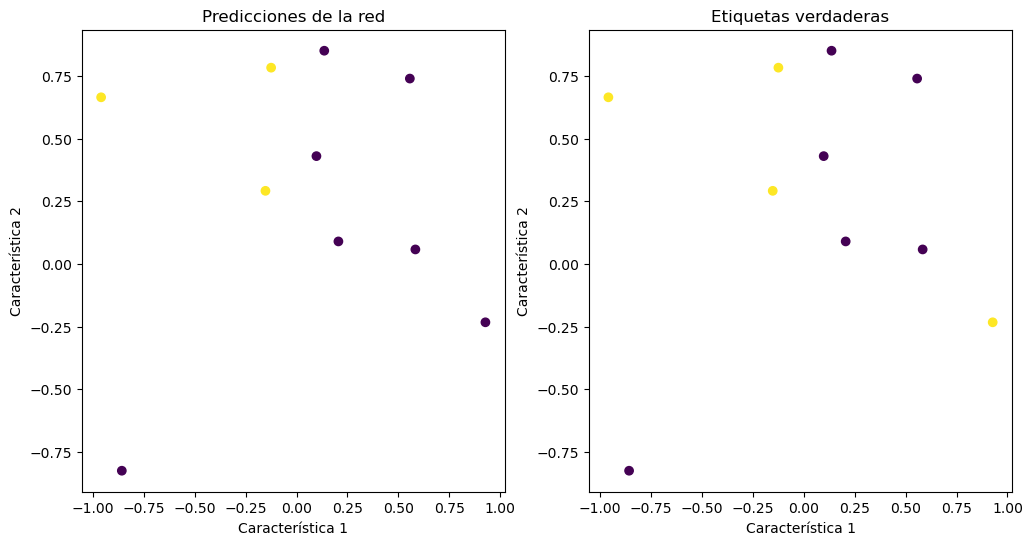

In [135]:
import matplotlib.pyplot as plt

# Obtener las salidas de la red
salida = red.feedforward(X)

# Convertir las salidas a predicciones de clase
predicciones = np.where(salida > 0.5, 1, -1)

# Graficar las predicciones y las etiquetas verdaderas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=predicciones.reshape(-1), cmap='viridis')
plt.title('Predicciones de la red')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap='viridis')
plt.title('Etiquetas verdaderas')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

plt.show()
